In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score 
from sklearn import svm, datasets

In [28]:
# Load the dataset
df = pd.read_excel('default of credit card clients.xls')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [23]:
df.shape

(30000, 25)

In [8]:
# Step 2: Calculate descriptive statistics
statistics = df.describe()

# Step 3: Print the descriptive statistics
print(statistics)

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

In [10]:
# Assuming 'df' is your DataFrame
missing_values = df.isnull().sum()
print(missing_values)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


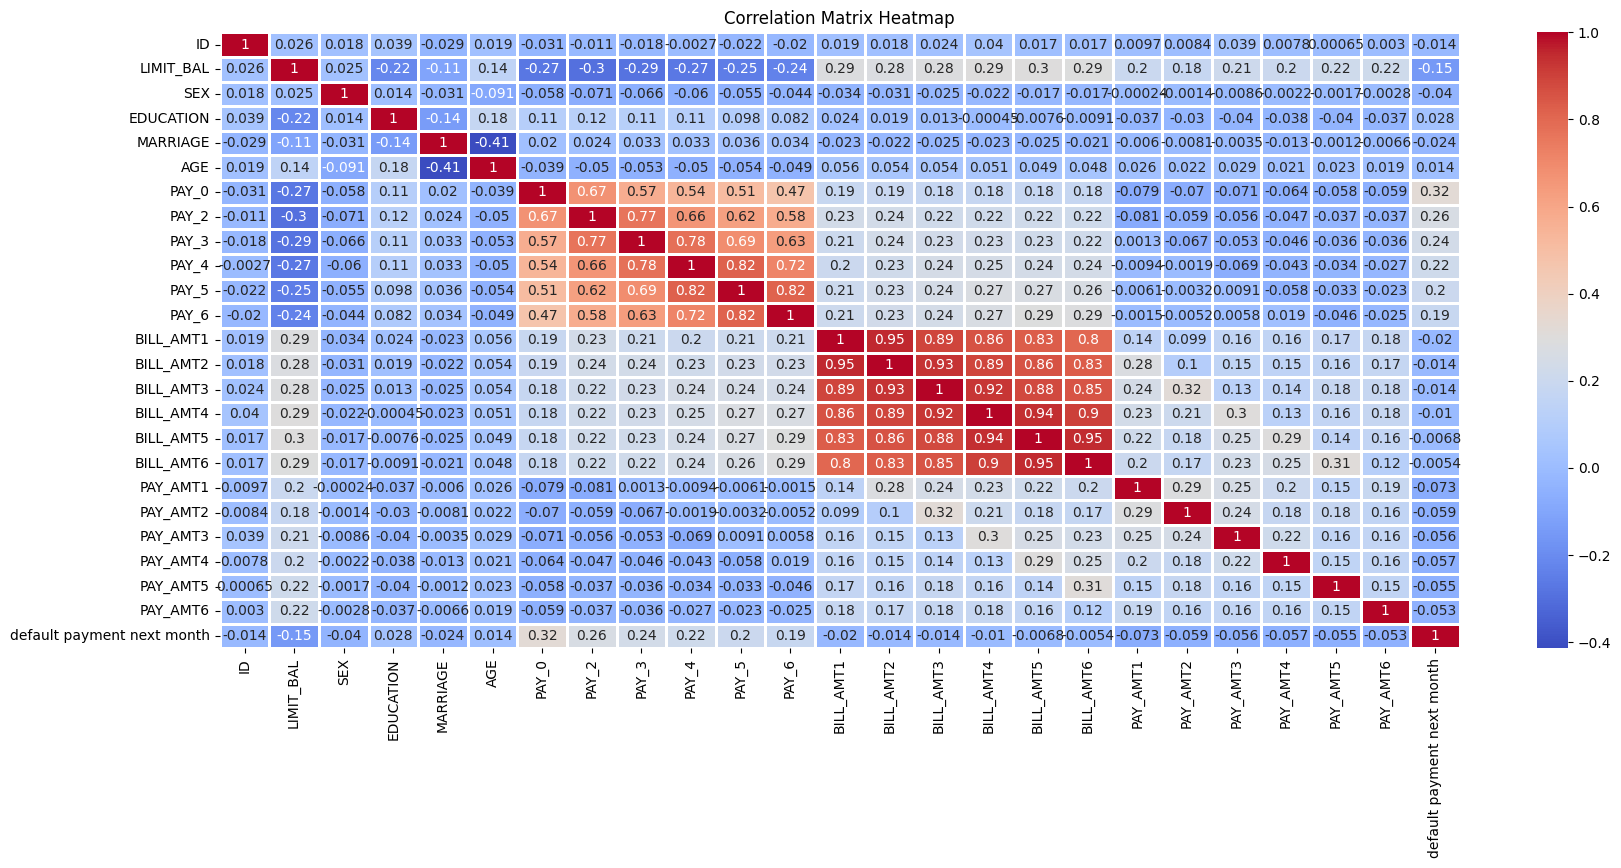

In [16]:
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

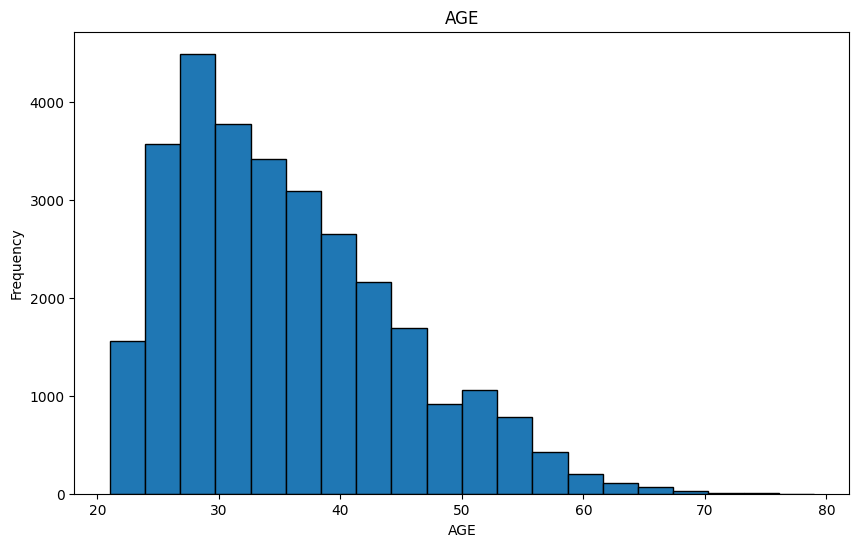

In [6]:
#Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['AGE'], bins=20, edgecolor='black')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.title('AGE')
plt.show()

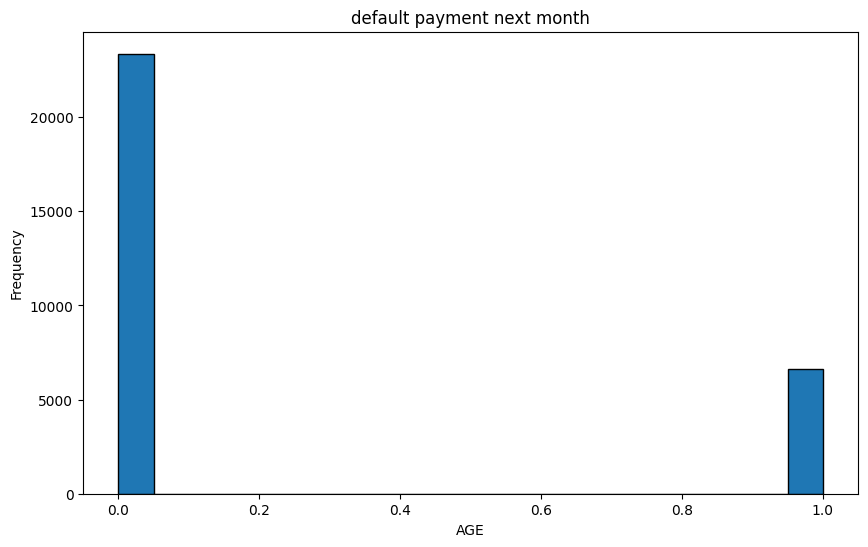

In [7]:
#Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['default payment next month'], bins=20, edgecolor='black')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.title('default payment next month')
plt.show()

In [26]:
# Select features and target variable
X = df.iloc[:, 1:-1]  # Features
y = df.iloc[:, -1]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model and its **Score**

In [18]:
# Create an SVM classifier
svm = SVC()

# Fit the model to the training data
svm.fit(X_train, y_train)

SVC()

In [50]:
model = SVC()
model.fit(X_train, y_train)
print(model)

SVC()


In [19]:
# Create the SVM classifier
svm = SVC()

# Fit the model on the training data
svm.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = svm.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy* 100)

Accuracy: 78.11666666666667


In [53]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Convert continuous labels to categorical using binning or thresholding
threshold = 0.5  # Set the threshold for binning or thresholding

# Convert training labels to categorical
y_train_categorical = np.where(y_train >= threshold, 1, 0)

# Convert test labels to categorical
y_test_categorical = np.where(y_test >= threshold, 1, 0)

# Create an SVM classifier with polynomial kernel of degree 2
model = SVC(kernel='poly', degree=2)
model.fit(X_train, y_train_categorical)

# Make predictions on the test data
classifier_predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_categorical, classifier_predictions)
print("Accuracy:", accuracy * 100)

Accuracy: 78.11666666666667


In [55]:
from sklearn.metrics import accuracy_score, classification_report
# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, classifier_predictions)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[4687    0]
 [1313    0]]


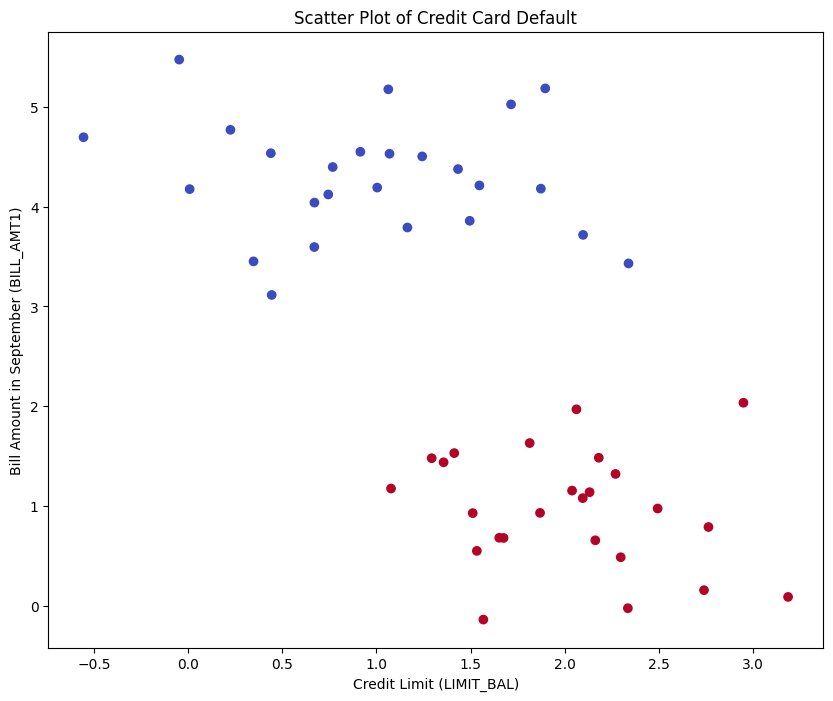

In [64]:

svm = SVC()
svm.fit(X, y)

# Step 4: Plot the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel("Credit Limit (LIMIT_BAL)")
plt.ylabel("Bill Amount in September (BILL_AMT1)")
plt.title("Scatter Plot of Credit Card Default")
plt.show()

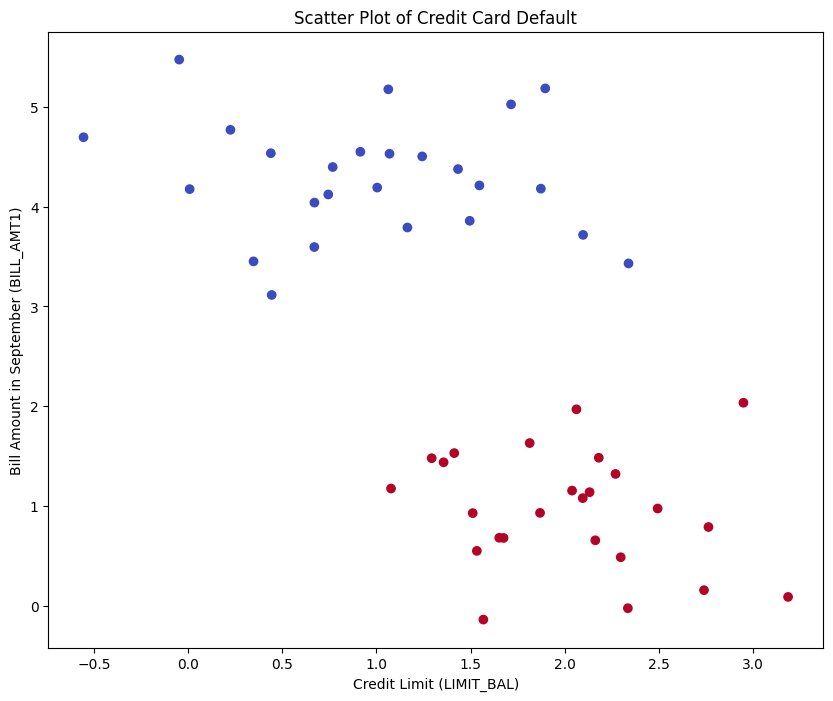

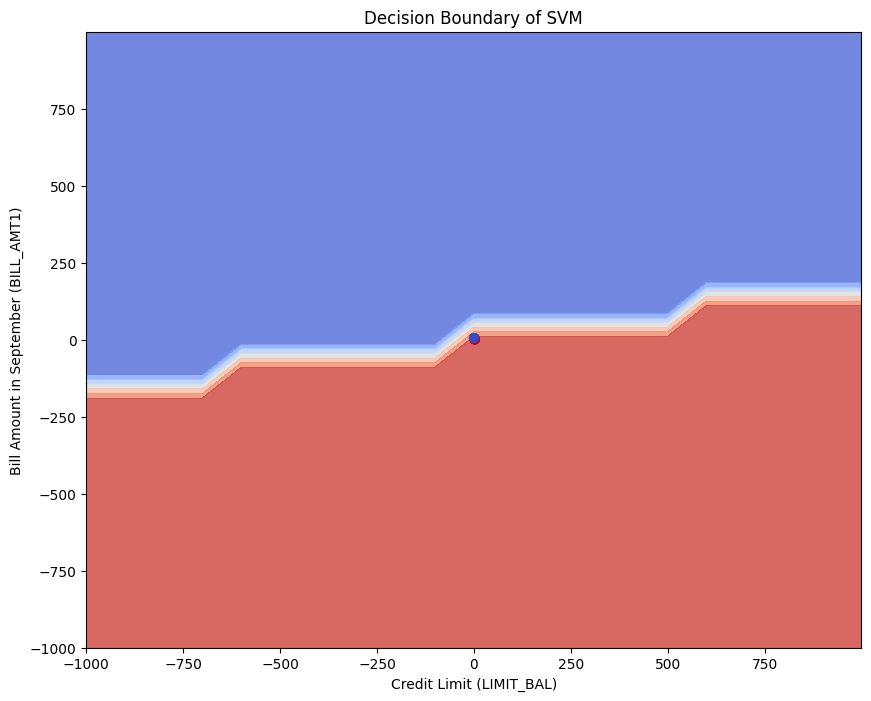

In [73]:
svm = SVC(kernel='linear')
svm.fit(X, y)

# Step 4: Plot the scatter plot with decision boundary
plt.figure(figsize=(10, 8))

# Plot the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel("Credit Limit (LIMIT_BAL)")
plt.ylabel("Bill Amount in September (BILL_AMT1)")
plt.title("Scatter Plot of Credit Card Default")
# Create a meshgrid for the decision boundary
xx, yy = np.meshgrid(np.arange(X[:, 0].min()-1000, X[:, 0].max()+1000, 100),
                     np.arange(X[:, 1].min()-1000, X[:, 1].max()+1000, 100))

# Plot the decision boundary
plt.figure(figsize=(10, 8))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel("Credit Limit (LIMIT_BAL)")
plt.ylabel("Bill Amount in September (BILL_AMT1)")
plt.title("Decision Boundary of SVM")
plt.show()

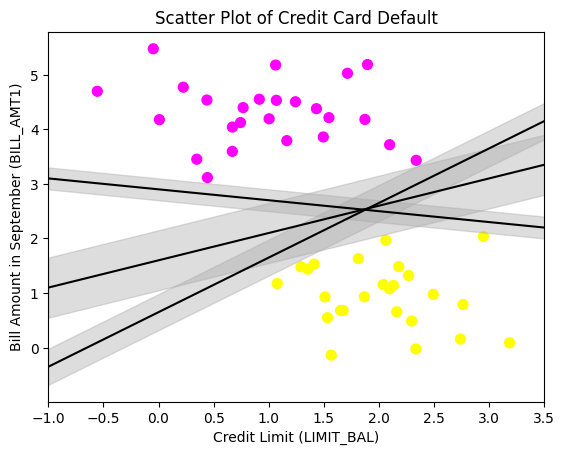

In [80]:

# creating linspace between -1 to 3.5 
xfit = np.linspace(-1, 3.5)
  
# plotting scatter
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
  
# plot a line between the different sets of data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', 
    color='#AAAAAA', alpha=0.4)
  
plt.xlim(-1, 3.5);
plt.xlabel("Credit Limit (LIMIT_BAL)")
plt.ylabel("Bill Amount in September (BILL_AMT1)")
plt.title("Scatter Plot of Credit Card Default")
plt.show()